<h3> SciPython/Practical_classes_3

<h4> Linear regression

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [68]:
target = data['MEDV']
d2 = data[['INDUS', 'RM']].to_numpy()

In [69]:
d2

array([[ 2.31 ,  6.575],
       [ 7.07 ,  6.421],
       [ 7.07 ,  7.185],
       ...,
       [11.93 ,  6.976],
       [11.93 ,  6.794],
       [11.93 ,  6.03 ]])

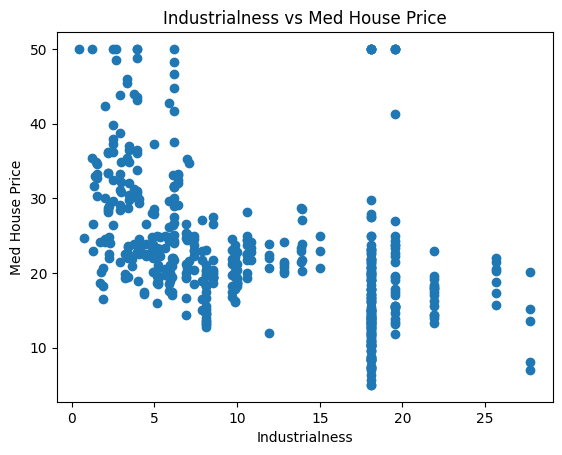

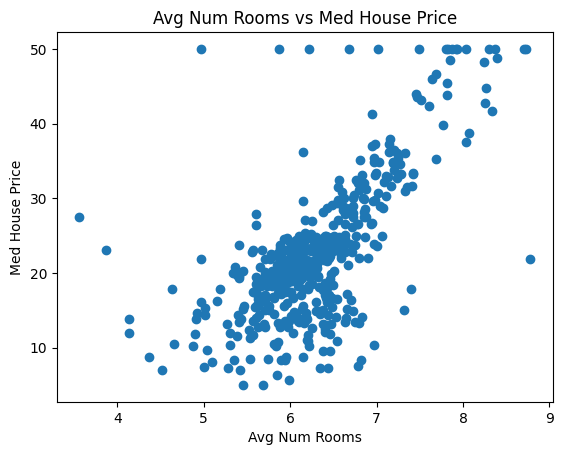

In [39]:
plt.title('Industrialness vs Med House Price')
plt.scatter(d2[:, 0], target)
plt.xlabel('Industrialness')
plt.ylabel('Med House Price')
plt.show()

plt.title('Avg Num Rooms vs Med House Price')
plt.scatter(d2[:, 1], target)
plt.xlabel('Avg Num Rooms')
plt.ylabel('Med House Price')
plt.show()

The loss function measures the average difference between the prediction $y$ and the actual value $t$. There are many functions of this type, one of the most popular is:

$LF(y,t) = \frac{1}{2N}\sum_{i}(y^{i}-t^{i})^2$
    
 

For linear regression of 2 variables:    

$LF(y,t) = \frac{1}{2N}\sum_{i}(w_1x_{1}^{i}+w_2x_{2}^{i}+w_0-t^{i})^2$

In [40]:
def loss_function(w1, w2, w0, X, t):
     x1 = X[:, 0]
     x2 = X[:, 1]
     i = len(x1)
     return sum(((w1*x1 + w2*x2 + w0 - t)**2))/(2*i)


In [41]:
loss_function(3, 8, -1, d2, target)

2088.9192750474317

In [42]:
loss_function(-0.5, 8, -23, d2, target)

20.61716585276679

<h4> Exercise1: Complete the content of the above function.

Usually, at the beginning we do not have information what the parameters of the model should be; we can start with random values. So the question arises how to update them so that the loss function values are getting smaller and smaller? One of the most popular approaches (and the basis for other algorithms) is based on the Gradient Descent method. We calculate the derivative of the cost function on the considered parameters and then update them according to:

$w_{new} = w_{old} - \alpha \cdot \frac{d LF}{dw}$

In [43]:
def update_weights(w1, w2, w0, X, t, alpha):
    x1 = X[:, 0]
    x2 = X[:, 1]
    i = len(x1)
    expression = w1*x1 + w2*x2 + w0 - t
    w1_new = w1 - (alpha * sum(x1*expression/i))
    w2_new = w2 - (alpha * sum(x2*expression/i))
    w0_new = w0 - (alpha * sum(expression/i))
    return (w1_new, w2_new, w0_new)

In [44]:
#example 
update_weights(3, 8, -1, d2, target, 0.001)

(2.173770491027668, 7.628145982577075, -1.060154604743083)

<h4> Exercise2: Complete the content of the above function.

Exercise3: The goal is to build a linear regression model predicting $target$ based on $d2$. Start with the initial parameters 1, 1 and 1. Assuming $\alpha=0.001$, do 1000 updates of these parameters based on the gradient method. Draw the dependence of the cost function on the number of iterations. Perform analogous calculations for $\alpha=0.01$ and $\alpha=0.00001$. Comment your results

In [45]:
def iterate_weights(w1, w2, w0, X, t, alpha, iterations=1000):
    loss_values = []
    for i in range(iterations):
        x = loss_function(w1, w2, w0, X, t)
        loss_values.append(x)
        w1, w2, w0 = update_weights(w1, w2, w0, X, t, alpha)
        
    return w1, w2, w0,loss_values

(-0.5240516597773189, 4.34809215685596, 1.2535642605913602)

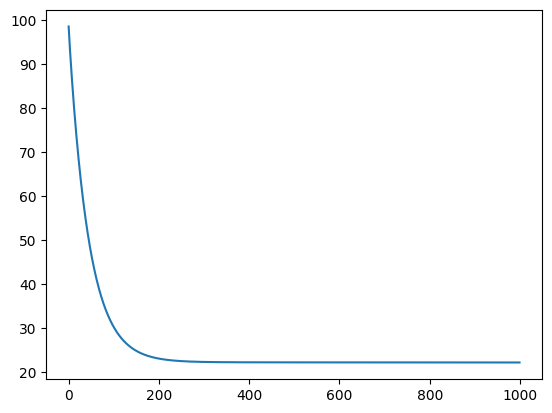

In [46]:
w1,w2,w0,loss_values = iterate_weights(1,1,1,d2,target,0.001)
plt.plot(loss_values)
w1,w2,w0

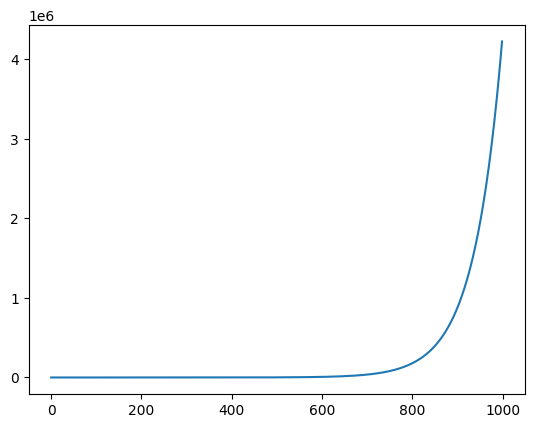

In [15]:
w1,w2,w0,loss_values = iterate_weights(1,1,1,d2,target,0.01)
plt.plot(loss_values)

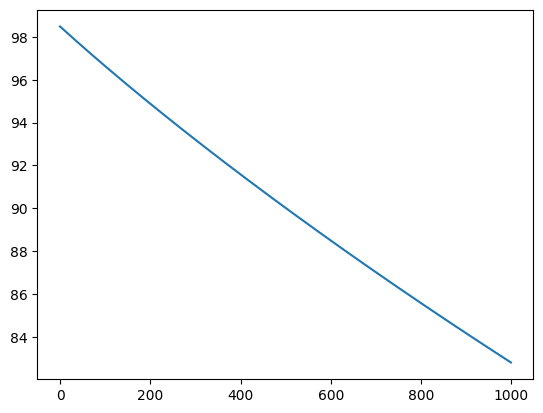

In [16]:
w1,w2,w0,loss_values = iterate_weights(1,1,1,d2,target,0.00001)
plt.plot(loss_values)

When alpha is 0.00001 then the loss values drop, but very slowly, when 0.01 the step is too large and the loss values go away from the minimum. A step of 0.001 is appropriate because it quickly approaches the minimum.

<h4> Exercise4: We usually don't know in advance how many times we need to modify the weights - when further updating has no effect. One solution to this problem is to check by what percentage the current weights change. Let's assume that if the change in the cost function is less than 0.1%, we stop the operation. How many steps should be taken to complete the previous task?

In [47]:
def iterate_weights_it(w1, w2, w0, X, t, alpha):
    loss_values = []
    for i in range(2):
        x = loss_function(w1, w2, w0, X, t)
        loss_values.append(x)
        w1, w2, w0 = update_weights(w1, w2, w0, X, t, alpha)
    while ((loss_values[-2]-loss_values[-1])/loss_values[-2]>0.001):
        z = loss_function(w1, w2, w0, X, t)
        loss_values.append(z)
        w1, w2, w0 = update_weights(w1, w2, w0, X, t, alpha)
    return w1,w2,w0,len(loss_values)

In [48]:
iterate_weights_it(1,1,1,d2,target,0.001)

(-0.3588933084192414, 3.941613992647317, 1.3706096243577197, 193)

It takes 193 iterations to get 0.1% cost function. We get parameters: w1 = -0.36, w2 = 3.94, w0 == 1.37

Obviously, there is an implementation of the linear regression method in Python

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression()
model.fit(d2, target);

In [51]:
model.coef_ #weights for variables

array([-0.33471389,  7.82205511])

In [52]:
model.intercept_ #w0 parameter

-22.89831572922507

<h4> Exercise5: Compare these parameters with those obtained from Exercise3. Try to explain the observed discrepnacies.

Ex 3 - (-0.5240516597773189, 4.34809215685596, 1.2535642605913602)
Ex 5 - (-0.3588933084192414, 3.941613992647317, 1.3706096243577197)
In excercise 3 the cost function is smaller than in excercise 5 - the parameters w1,w2,w0 are better predicted. In excercise 5 we were predicting w1,w2,w0 only to the certain cost funcion treshold - 0.1%. But the differences between parameters aren't that big, parameters from excercise 5 are sufficient.

In [53]:
r_sq = model.score(d2, target) #R2 for model
print(r_sq) 

0.5362984005856312


In [54]:
y_pred = model.predict(d2) #predictions
print(y_pred[:5])

[27.75850755 24.96067296 30.93672306 31.11074967 32.27623588]


<h3> What if the dependence is not linear?

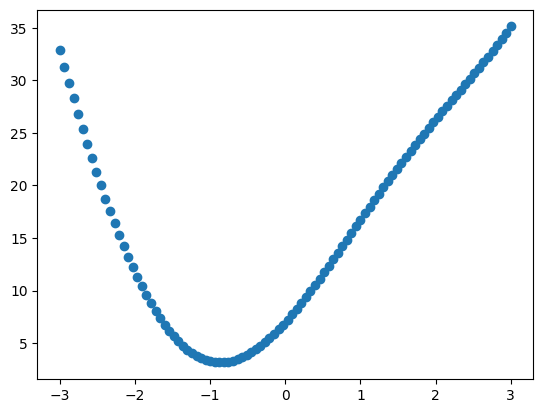

In [55]:
def non_linear(x):
    return 3*x**2+8*np.sin(x)+7

x = np.linspace(-3,3,100) #100 numbers from the [-3,3] range
y = non_linear(x)

plt.scatter(x,y)
plt.show()

In [65]:
x1 = x**2
x2 = np.sin(x)
X = np.vstack((x1, x2)).T #make a 2D table
target2=y

In [66]:
w1 = 1
w2 = 1
w0 = 1

l = []

for i in range(10000):
    l.append(loss_function(w1, w2, w0, X, target2))
    w1, w2, w0 = update_weights(w1, w2, w0, X, target2, 0.001)

In [67]:
w1, w2, w0

(3.0137576012588307, 7.9607443561805535, 6.926150356697879)

Conclusion: The linear method can also be used for non-linear relations.

<h3> Model parameters vs. hyperparameters


- model parameters ($w_1, w_2, w_0$)
- hyperparameters (e.g. $\alpha$) are external to the model

We usually divide the data into 2 or 3 groups - a training set, a validation set and a test set.

Generally:
- On the training set, we teach the model parameters using the gradient descent method.
- Using the validation set, we select the most optimal hyperparameters.
- We check the selected set of parameters and hyperparameters on the test set

Exercise6: Consider again the data $d2/target$.
    
- Divide them into three subsets - training (60%), validation (20%) and test (20%); define the appropriate in-built function for such as task.
- Test different values of $\alpha$ parameters on the validation set, on this basis choose one that you will use to train the model parameters on the training set.
- Finally, evaluate the cost function on the test set. Comment your results.

In [71]:
from sklearn.model_selection import train_test_split
def split(x,y, v, t):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=v+t, random_state=0)
    x_train, x_validate, y_train, y_validate = train_test_split(x_test, y_test, test_size=t/(t+v), random_state=0)
    return x_train, x_test, y_train, y_test, x_validate, y_validate

In [72]:
x_train, x_test, y_train, y_test, x_validate, y_validate = split(d2,target,0.2,0.2)

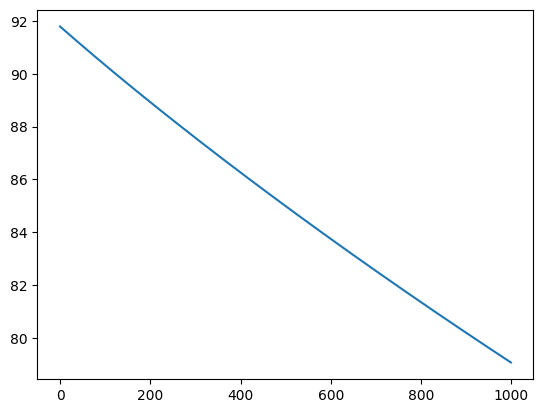

In [73]:
w1,w2,w0,loss_values = iterate_weights(1,1,1,x_validate,y_validate,0.00001)
plt.plot(loss_values)

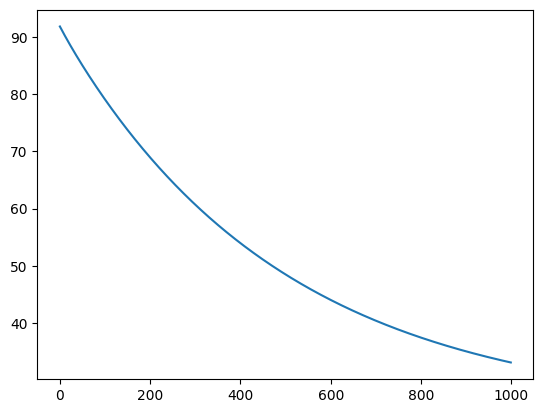

In [74]:
w1,w2,w0,loss_values = iterate_weights(1,1,1,x_validate,y_validate,0.0001)
plt.plot(loss_values)

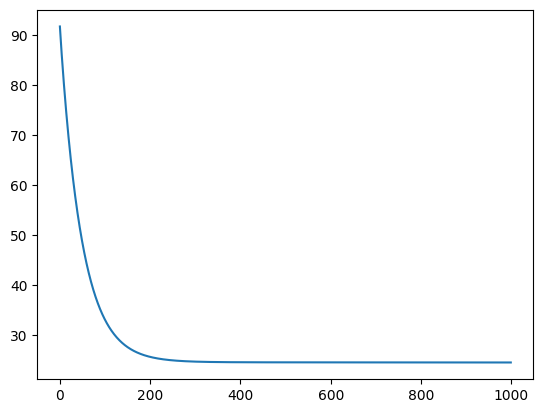

In [75]:
w1,w2,w0,loss_values = iterate_weights(1,1,1,x_validate,y_validate,0.001) #the best
plt.plot(loss_values)

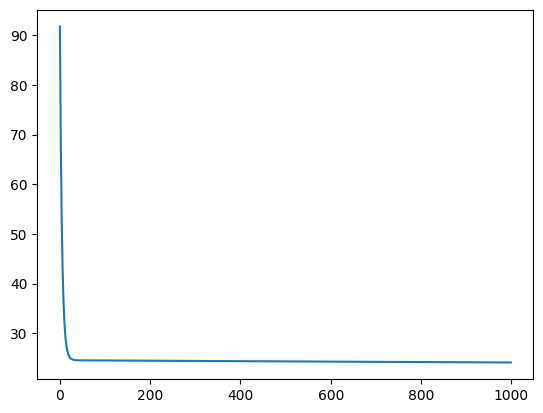

In [76]:
w1,w2,w0,loss_values = iterate_weights(1,1,1,x_validate,y_validate,0.01)
plt.plot(loss_values)

In [78]:
w1,w2,w0,loss_values = iterate_weights(1,1,1,x_test,y_test,0.01)
w1,w2,w0

(-0.4992758790811593, 4.57017771241261, -0.5945458088140785)

In [79]:
loss_function(-0.4992758790811593, 4.57017771241261, -0.5945458088140785, x_test,y_test)

22.245116824904965

22.7 is quite a good result, looking at the previous plots it is rather, the lowest value that can be reached, in the shotrest period of time. So we can assume that w1 = -0.5, w2 = 4.57 and w0 = -0.59 are good parameters for given data.

<h3> Supplementary materials

In [ ]:
#pandas and standarization (x-mean)/sd

import pandas as pd
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = pd.DataFrame({"a":[1,2,6], "b":[0,5,-5]})
print(X)
print()
scaledX = scale.fit_transform(X)
print(scaledX)

   a  b
0  1  0
1  2  5
2  6 -5

[[-0.9258201   0.        ]
 [-0.46291005  1.22474487]
 [ 1.38873015 -1.22474487]]


In [ ]:
#compare with the previous cell
v = np.array([1,2,6])
print((v - np.mean(v))/np.std(v))

[-0.9258201  -0.46291005  1.38873015]


In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)
print(X)
print()
print(list(y))
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(X_train)
print()
print(X_test)
print()
print(y_train)
print()
print(y_test)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]

[0, 1, 2, 3, 4]

[[4 5]
 [0 1]
 [6 7]]

[[2 3]
 [8 9]]

[2, 0, 3]

[1, 4]
